In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.17.3
pandas 0.25.2
sklearn 0.21.3
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
import pprint

pprint.pprint(housing.data[0:5])
pprint.pprint(housing.target[0:5])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [4]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [6]:
# RandomizedSearchCV
# 1.转换为sklearn的model
# 2.定义参数集合
# 3.索索

def build_model(hidden_layers = 1,
               layer_size = 30,
               learning_rate = 3e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(layer_size, activation='relu',
                                 input_shape=x_train.shape[1:]))
    for _ in range(layer_size -1):
        model.add(keras.layers.Dense(layer_size, activation='relu'))
        
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss = 'mse', optimizer = optimizer)
    return model

sklearn_model = keras.wrappers.scikit_learn.KerasRegressor(build_model)
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]
history = sklearn_model.fit(x_train_scaled, y_train, 
                            epochs=100, 
                            validation_data=(x_valid_scaled, y_valid),
                            callbacks = callbacks)


Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 204us/sample - loss: 1.7248 - val_loss: 1.3829
Epoch 2/100
11610/11610 [==============================] - 1s 75us/sample - loss: 1.3147 - val_loss: 1.3828
Epoch 3/100
11610/11610 [==============================] - 1s 73us/sample - loss: 1.3143 - val_loss: 1.3818
Epoch 4/100
11610/11610 [==============================] - 1s 72us/sample - loss: 1.3145 - val_loss: 1.3820
Epoch 5/100
11610/11610 [==============================] - 1s 73us/sample - loss: 1.3148 - val_loss: 1.3839
Epoch 6/100
11610/11610 [==============================] - 1s 75us/sample - loss: 1.3081 - val_loss: 1.3564
Epoch 7/100
11610/11610 [==============================] - 1s 78us/sample - loss: 1.2023 - val_loss: 1.0435
Epoch 8/100
11610/11610 [==============================] - 1s 76us/sample - loss: 0.8962 - val_loss: 0.8409
Epoch 9/100
11610/11610 [==============================] - 1s 79us/sample - loss: 0.74

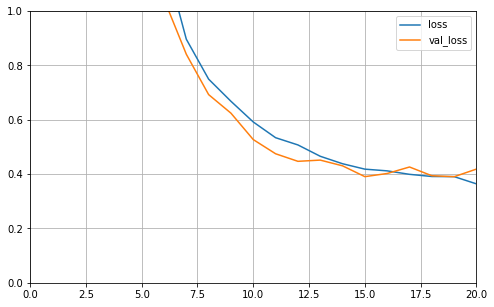

In [7]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

    
plot_learning_curves(history)

In [9]:
from scipy.stats import reciprocal
# f(x) = 1/(x*log(b/a))  a <= x <= b

param_distribution = {
    'hidden_layers':[1, 2, 3, 4],
    'layer_size':np.arange(1, 100),
    'learning_rate':reciprocal(1e-4, 1e-2)
}

from sklearn.model_selection import RandomizedSearchCV

random_search_cv = RandomizedSearchCV(sklearn_model, param_distribution, n_iter=10, n_jobs=1)
random_search_cv.fit(x_train_scaled, y_train, epochs = 100,
                    validation_data = (x_valid_scaled, y_valid),
                    callbacks = callbacks)


Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 4s 532us/sample - loss: 4.8439 - val_loss: 4.4007
Epoch 2/100
7740/7740 [==============================] - 1s 173us/sample - loss: 3.6785 - val_loss: 3.3585
Epoch 3/100
7740/7740 [==============================] - 1s 178us/sample - loss: 2.7847 - val_loss: 2.5591
Epoch 4/100
7740/7740 [==============================] - 1s 178us/sample - loss: 2.1283 - val_loss: 1.9980
Epoch 5/100
7740/7740 [==============================] - 1s 168us/sample - loss: 1.7029 - val_loss: 1.6594
Epoch 6/100
7740/7740 [==============================] - 1s 176us/sample - loss: 1.4739 - val_loss: 1.4933
Epoch 7/100
7740/7740 [==============================] - 1s 179us/sample - loss: 1.3740 - val_loss: 1.4236
Epoch 8/100
7740/7740 [==============================] - 1s 192us/sample - loss: 1.3375 - val_loss: 1.3980
Epoch 9/100
7740/7740 [==============================] - 1s 182us/sample - loss: 1.3260 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 4s 557us/sample - loss: 4.7800 - val_loss: 4.3176
Epoch 2/100
7740/7740 [==============================] - 1s 180us/sample - loss: 3.5356 - val_loss: 3.1878
Epoch 3/100
7740/7740 [==============================] - 1s 182us/sample - loss: 2.5642 - val_loss: 2.3175
Epoch 4/100
7740/7740 [==============================] - 1s 183us/sample - loss: 1.8770 - val_loss: 1.7614
Epoch 5/100
7740/7740 [==============================] - 1s 176us/sample - loss: 1.5016 - val_loss: 1.5004
Epoch 6/100
7740/7740 [==============================] - 1s 177us/sample - loss: 1.3588 - val_loss: 1.4157
Epoch 7/100
7740/7740 [==============================] - 1s 177us/sample - loss: 1.3203 - val_loss: 1.3918
Epoch 8/100
7740/7740 [==============================] - 1s 178us/sample - loss: 1.3121 - val_loss: 1.3860
Epoch 9/100
7740/7740 [==============================] - 1s 169us/sample - loss: 1.3108 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 4s 520us/sample - loss: 4.6333 - val_loss: 4.0931
Epoch 2/100
7740/7740 [==============================] - 1s 167us/sample - loss: 3.2350 - val_loss: 2.8546
Epoch 3/100
7740/7740 [==============================] - 1s 173us/sample - loss: 2.2283 - val_loss: 2.0052
Epoch 4/100
7740/7740 [==============================] - 1s 179us/sample - loss: 1.6293 - val_loss: 1.5752
Epoch 5/100
7740/7740 [==============================] - 1s 173us/sample - loss: 1.3870 - val_loss: 1.4315
Epoch 6/100
7740/7740 [==============================] - 1s 173us/sample - loss: 1.3225 - val_loss: 1.3941
Epoch 7/100
7740/7740 [==============================] - 1s 178us/sample - loss: 1.3108 - val_loss: 1.3864
Epoch 8/100
7740/7740 [==============================] - 1s 185us/sample - loss: 1.3092 - val_loss: 1.3842
Epoch 9/100
7740/7740 [==============================] - 1s 172us/sample - loss: 1.3091 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 183us/sample - loss: 4.3075 - val_loss: 3.4329
Epoch 2/100
7740/7740 [==============================] - 0s 59us/sample - loss: 2.4937 - val_loss: 1.9805
Epoch 3/100
7740/7740 [==============================] - 0s 56us/sample - loss: 1.5496 - val_loss: 1.4391
Epoch 4/100
7740/7740 [==============================] - 0s 60us/sample - loss: 1.3111 - val_loss: 1.3515
Epoch 5/100
7740/7740 [==============================] - 0s 62us/sample - loss: 1.2800 - val_loss: 1.3355
Epoch 6/100
7740/7740 [==============================] - 1s 67us/sample - loss: 1.2710 - val_loss: 1.3260
Epoch 7/100
7740/7740 [==============================] - 0s 61us/sample - loss: 1.2621 - val_loss: 1.3164
Epoch 8/100
7740/7740 [==============================] - 0s 64us/sample - loss: 1.2516 - val_loss: 1.3047
Epoch 9/100
7740/7740 [==============================] - 0s 60us/sample - loss: 1.2395 - val_loss: 1.29

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 142us/sample - loss: 4.8023 - val_loss: 4.3695
Epoch 2/100
7740/7740 [==============================] - 0s 61us/sample - loss: 3.6324 - val_loss: 3.3445
Epoch 3/100
7740/7740 [==============================] - 0s 54us/sample - loss: 2.7755 - val_loss: 2.5950
Epoch 4/100
7740/7740 [==============================] - 0s 56us/sample - loss: 2.1680 - val_loss: 2.0761
Epoch 5/100
7740/7740 [==============================] - 0s 55us/sample - loss: 1.7698 - val_loss: 1.7495
Epoch 6/100
7740/7740 [==============================] - 0s 53us/sample - loss: 1.5350 - val_loss: 1.5640
Epoch 7/100
7740/7740 [==============================] - 0s 57us/sample - loss: 1.4114 - val_loss: 1.4685
Epoch 8/100
7740/7740 [==============================] - 0s 57us/sample - loss: 1.3522 - val_loss: 1.4217
Epoch 9/100
7740/7740 [==============================] - 0s 62us/sample - loss: 1.3259 - val_loss: 1.40

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 142us/sample - loss: 4.7019 - val_loss: 4.2098
Epoch 2/100
7740/7740 [==============================] - 0s 58us/sample - loss: 3.3898 - val_loss: 3.0552
Epoch 3/100
7740/7740 [==============================] - 0s 56us/sample - loss: 2.4412 - val_loss: 2.2374
Epoch 4/100
7740/7740 [==============================] - 0s 60us/sample - loss: 1.8217 - val_loss: 1.7445
Epoch 5/100
7740/7740 [==============================] - 0s 56us/sample - loss: 1.4945 - val_loss: 1.5113
Epoch 6/100
7740/7740 [==============================] - 0s 58us/sample - loss: 1.3609 - val_loss: 1.4217
Epoch 7/100
7740/7740 [==============================] - 0s 53us/sample - loss: 1.3169 - val_loss: 1.3907
Epoch 8/100
7740/7740 [==============================] - 0s 53us/sample - loss: 1.3040 - val_loss: 1.3802
Epoch 9/100
7740/7740 [==============================] - 0s 59us/sample - loss: 1.2999 - val_loss: 1.37

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 6s 834us/sample - loss: 2.2677 - val_loss: 1.3849
Epoch 2/100
7740/7740 [==============================] - 3s 346us/sample - loss: 1.3220 - val_loss: 1.3834
Epoch 3/100
7740/7740 [==============================] - 3s 358us/sample - loss: 1.3218 - val_loss: 1.3848
Epoch 4/100
7740/7740 [==============================] - 3s 351us/sample - loss: 1.3220 - val_loss: 1.3816
Epoch 5/100
7740/7740 [==============================] - 3s 358us/sample - loss: 1.3220 - val_loss: 1.3818
Epoch 6/100
7740/7740 [==============================] - 3s 352us/sample - loss: 1.3222 - val_loss: 1.3820
3870/1 [==============================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 7s 873us/sample - loss: 2.2733 - val_loss: 1.3836
Epoch 2/100
7740/7740 [==============================] - 3s 384us/sample - loss: 1.3113 - val_loss: 1.3822
Epoch 3/100
7740/7740 [==============================] - 3s 379us/sample - loss: 1.3114 - val_loss: 1.3829
Epoch 4/100
7740/7740 [==============================] - 3s 381us/sample - loss: 1.3113 - val_loss: 1.3848
Epoch 5/100
7740/7740 [==============================] - 3s 374us/sample - loss: 1.3113 - val_loss: 1.3820
Epoch 6/100
7740/7740 [==============================] - 3s 382us/sample - loss: 1.3109 - val_loss: 1.3829
3870/1 [==============================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 7s 872us/sample - loss: 2.1261 - val_loss: 1.3857
Epoch 2/100
7740/7740 [==============================] - 3s 419us/sample - loss: 1.3099 - val_loss: 1.3843
Epoch 3/100
7740/7740 [==============================] - 3s 410us/sample - loss: 1.3104 - val_loss: 1.3850
Epoch 4/100
7740/7740 [==============================] - 3s 411us/sample - loss: 1.3102 - val_loss: 1.3827
Epoch 5/100
7740/7740 [==============================] - 3s 405us/sample - loss: 1.3100 - val_loss: 1.3843
Epoch 6/100
7740/7740 [==============================] - 3s 410us/sample - loss: 1.3099 - val_loss: 1.3830
3870/1 [==============================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 306us/sample - loss: 4.9091 - val_loss: 4.5187
Epoch 2/100
7740/7740 [==============================] - 1s 110us/sample - loss: 3.8155 - val_loss: 3.5089
Epoch 3/100
7740/7740 [==============================] - 1s 110us/sample - loss: 2.9179 - val_loss: 2.6736
Epoch 4/100
7740/7740 [==============================] - 1s 114us/sample - loss: 2.2044 - val_loss: 2.0404
Epoch 5/100
7740/7740 [==============================] - 1s 117us/sample - loss: 1.7151 - val_loss: 1.6500
Epoch 6/100
7740/7740 [==============================] - 1s 119us/sample - loss: 1.4573 - val_loss: 1.4719
Epoch 7/100
7740/7740 [==============================] - 1s 119us/sample - loss: 1.3587 - val_loss: 1.4096
Epoch 8/100
7740/7740 [==============================] - 1s 115us/sample - loss: 1.3299 - val_loss: 1.3910
Epoch 9/100
7740/7740 [==============================] - 1s 115us/sample - loss: 1.3233 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 3s 364us/sample - loss: 4.7811 - val_loss: 4.3235
Epoch 2/100
7740/7740 [==============================] - 1s 118us/sample - loss: 3.5605 - val_loss: 3.2417
Epoch 3/100
7740/7740 [==============================] - 1s 111us/sample - loss: 2.6507 - val_loss: 2.4404
Epoch 4/100
7740/7740 [==============================] - 1s 112us/sample - loss: 2.0060 - val_loss: 1.8990
Epoch 5/100
7740/7740 [==============================] - 1s 120us/sample - loss: 1.6128 - val_loss: 1.5980
Epoch 6/100
7740/7740 [==============================] - 1s 115us/sample - loss: 1.4202 - val_loss: 1.4627
Epoch 7/100
7740/7740 [==============================] - 1s 118us/sample - loss: 1.3445 - val_loss: 1.4111
Epoch 8/100
7740/7740 [==============================] - 1s 113us/sample - loss: 1.3200 - val_loss: 1.3937
Epoch 9/100
7740/7740 [==============================] - 1s 114us/sample - loss: 1.3131 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 292us/sample - loss: 4.6920 - val_loss: 4.2052
Epoch 2/100
7740/7740 [==============================] - 1s 117us/sample - loss: 3.3789 - val_loss: 3.0320
Epoch 3/100
7740/7740 [==============================] - 1s 116us/sample - loss: 2.4011 - val_loss: 2.1779
Epoch 4/100
7740/7740 [==============================] - 1s 116us/sample - loss: 1.7606 - val_loss: 1.6805
Epoch 5/100
7740/7740 [==============================] - 1s 122us/sample - loss: 1.4479 - val_loss: 1.4722
Epoch 6/100
7740/7740 [==============================] - 1s 109us/sample - loss: 1.3412 - val_loss: 1.4078
Epoch 7/100
7740/7740 [==============================] - 1s 114us/sample - loss: 1.3152 - val_loss: 1.3905
Epoch 8/100
7740/7740 [==============================] - 1s 119us/sample - loss: 1.3101 - val_loss: 1.3865
Epoch 9/100
7740/7740 [==============================] - 1s 116us/sample - loss: 1.3094 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 272us/sample - loss: 3.7551 - val_loss: 2.5573
Epoch 2/100
7740/7740 [==============================] - 1s 86us/sample - loss: 1.7839 - val_loss: 1.5051
Epoch 3/100
7740/7740 [==============================] - 1s 83us/sample - loss: 1.3495 - val_loss: 1.3888
Epoch 4/100
7740/7740 [==============================] - 1s 80us/sample - loss: 1.3220 - val_loss: 1.3832
Epoch 5/100
7740/7740 [==============================] - 1s 82us/sample - loss: 1.3216 - val_loss: 1.3838
Epoch 6/100
7740/7740 [==============================] - 1s 79us/sample - loss: 1.3216 - val_loss: 1.3829
Epoch 7/100
7740/7740 [==============================] - 1s 87us/sample - loss: 1.3216 - val_loss: 1.3828
Epoch 8/100
7740/7740 [==============================] - 1s 83us/sample - loss: 1.3216 - val_loss: 1.3832
3870/1 [===============================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 212us/sample - loss: 3.0047 - val_loss: 1.6130
Epoch 2/100
7740/7740 [==============================] - 1s 78us/sample - loss: 1.3445 - val_loss: 1.3843
Epoch 3/100
7740/7740 [==============================] - 1s 79us/sample - loss: 1.3108 - val_loss: 1.3851
Epoch 4/100
7740/7740 [==============================] - 1s 85us/sample - loss: 1.3105 - val_loss: 1.3842
Epoch 5/100
7740/7740 [==============================] - 1s 81us/sample - loss: 1.3103 - val_loss: 1.3815
Epoch 6/100
7740/7740 [==============================] - 1s 85us/sample - loss: 1.3106 - val_loss: 1.3818
Epoch 7/100
7740/7740 [==============================] - 1s 86us/sample - loss: 1.3104 - val_loss: 1.3814
3870/1 [=========================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 256us/sample - loss: 3.1395 - val_loss: 1.7919
Epoch 2/100
7740/7740 [==============================] - 1s 86us/sample - loss: 1.3909 - val_loss: 1.3901
Epoch 3/100
7740/7740 [==============================] - 1s 81us/sample - loss: 1.3094 - val_loss: 1.3838
Epoch 4/100
7740/7740 [==============================] - 1s 83us/sample - loss: 1.3094 - val_loss: 1.3831
Epoch 5/100
7740/7740 [==============================] - 1s 88us/sample - loss: 1.3094 - val_loss: 1.3835
Epoch 6/100
7740/7740 [==============================] - 1s 80us/sample - loss: 1.3094 - val_loss: 1.3842
Epoch 7/100
7740/7740 [==============================] - 1s 82us/sample - loss: 1.3093 - val_loss: 1.3847
3870/1 [=========================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 5s 684us/sample - loss: 2.7571 - val_loss: 1.4619
Epoch 2/100
7740/7740 [==============================] - 2s 280us/sample - loss: 1.3306 - val_loss: 1.3840
Epoch 3/100
7740/7740 [==============================] - 2s 270us/sample - loss: 1.3219 - val_loss: 1.3820
Epoch 4/100
7740/7740 [==============================] - 2s 282us/sample - loss: 1.3219 - val_loss: 1.3826
Epoch 5/100
7740/7740 [==============================] - 2s 281us/sample - loss: 1.3222 - val_loss: 1.3826
Epoch 6/100
7740/7740 [==============================] - 2s 292us/sample - loss: 1.3220 - val_loss: 1.3831
Epoch 7/100
7740/7740 [==============================] - 2s 281us/sample - loss: 1.3218 - val_loss: 1.3819
3870/1 [===================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 5s 696us/sample - loss: 3.0568 - val_loss: 1.7097
Epoch 2/100
7740/7740 [==============================] - 2s 287us/sample - loss: 1.3710 - val_loss: 1.3887
Epoch 3/100
7740/7740 [==============================] - 2s 278us/sample - loss: 1.3112 - val_loss: 1.3848
Epoch 4/100
7740/7740 [==============================] - 2s 288us/sample - loss: 1.3107 - val_loss: 1.3848
Epoch 5/100
7740/7740 [==============================] - 2s 284us/sample - loss: 1.3107 - val_loss: 1.3822
Epoch 6/100
7740/7740 [==============================] - 2s 286us/sample - loss: 1.3108 - val_loss: 1.3834
Epoch 7/100
7740/7740 [==============================] - 2s 284us/sample - loss: 1.3107 - val_loss: 1.3821
3870/1 [===================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 6s 711us/sample - loss: 3.5694 - val_loss: 2.3079
Epoch 2/100
7740/7740 [==============================] - 2s 294us/sample - loss: 1.5960 - val_loss: 1.4345
Epoch 3/100
7740/7740 [==============================] - 2s 290us/sample - loss: 1.3174 - val_loss: 1.3876
Epoch 4/100
7740/7740 [==============================] - 2s 298us/sample - loss: 1.3094 - val_loss: 1.3842
Epoch 5/100
7740/7740 [==============================] - 2s 289us/sample - loss: 1.3092 - val_loss: 1.3837
Epoch 6/100
7740/7740 [==============================] - 2s 293us/sample - loss: 1.3091 - val_loss: 1.3857
Epoch 7/100
7740/7740 [==============================] - 2s 288us/sample - loss: 1.3091 - val_loss: 1.3830
Epoch 8/100
7740/7740 [==============================] - 2s 298us/sample - loss: 1.3093 - val_loss: 1.3850
3870/1 [========================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 6s 830us/sample - loss: 2.2846 - val_loss: 1.3861
Epoch 2/100
7740/7740 [==============================] - 3s 395us/sample - loss: 1.3221 - val_loss: 1.3887
Epoch 3/100
7740/7740 [==============================] - 3s 367us/sample - loss: 1.3227 - val_loss: 1.3833
Epoch 4/100
7740/7740 [==============================] - 3s 369us/sample - loss: 1.3220 - val_loss: 1.3817
Epoch 5/100
7740/7740 [==============================] - 3s 371us/sample - loss: 1.3217 - val_loss: 1.3827
Epoch 6/100
7740/7740 [==============================] - 3s 369us/sample - loss: 1.3220 - val_loss: 1.3834
3870/1 [==============================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 7s 842us/sample - loss: 2.2330 - val_loss: 1.3906
Epoch 2/100
7740/7740 [==============================] - 3s 374us/sample - loss: 1.3111 - val_loss: 1.3825
Epoch 3/100
7740/7740 [==============================] - 3s 376us/sample - loss: 1.3112 - val_loss: 1.3854
Epoch 4/100
7740/7740 [==============================] - 3s 397us/sample - loss: 1.3111 - val_loss: 1.3828
Epoch 5/100
7740/7740 [==============================] - 3s 384us/sample - loss: 1.3110 - val_loss: 1.3850
Epoch 6/100
7740/7740 [==============================] - 3s 385us/sample - loss: 1.3112 - val_loss: 1.3817
3870/1 [==============================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 7s 853us/sample - loss: 2.0893 - val_loss: 1.3829
Epoch 2/100
7740/7740 [==============================] - 3s 366us/sample - loss: 1.3098 - val_loss: 1.3818
Epoch 3/100
7740/7740 [==============================] - 3s 367us/sample - loss: 1.3100 - val_loss: 1.3831
Epoch 4/100
7740/7740 [==============================] - 3s 359us/sample - loss: 1.3100 - val_loss: 1.3844
Epoch 5/100
7740/7740 [==============================] - 3s 370us/sample - loss: 1.3099 - val_loss: 1.3859
Epoch 6/100
7740/7740 [==============================] - 3s 366us/sample - loss: 1.3097 - val_loss: 1.3821
3870/1 [==============================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 4s 482us/sample - loss: 2.5848 - val_loss: 1.4368
Epoch 2/100
7740/7740 [==============================] - 1s 169us/sample - loss: 1.3260 - val_loss: 1.3822
Epoch 3/100
7740/7740 [==============================] - 1s 174us/sample - loss: 1.3216 - val_loss: 1.3820
Epoch 4/100
7740/7740 [==============================] - 1s 165us/sample - loss: 1.3218 - val_loss: 1.3847
Epoch 5/100
7740/7740 [==============================] - 1s 171us/sample - loss: 1.3220 - val_loss: 1.3829
Epoch 6/100
7740/7740 [==============================] - 1s 172us/sample - loss: 1.3220 - val_loss: 1.3824
Epoch 7/100
7740/7740 [==============================] - 1s 166us/sample - loss: 1.3222 - val_loss: 1.3824
3870/1 [===================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 4s 486us/sample - loss: 2.1707 - val_loss: 1.3862
Epoch 2/100
7740/7740 [==============================] - 1s 171us/sample - loss: 1.3115 - val_loss: 1.3842
Epoch 3/100
7740/7740 [==============================] - 1s 177us/sample - loss: 1.3107 - val_loss: 1.3822
Epoch 4/100
7740/7740 [==============================] - 1s 183us/sample - loss: 1.3114 - val_loss: 1.3828
Epoch 5/100
7740/7740 [==============================] - 1s 172us/sample - loss: 1.3115 - val_loss: 1.3848
Epoch 6/100
7740/7740 [==============================] - 1s 172us/sample - loss: 1.3111 - val_loss: 1.3818
3870/1 [==============================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 3s 419us/sample - loss: 2.1655 - val_loss: 1.3889
Epoch 2/100
7740/7740 [==============================] - 1s 169us/sample - loss: 1.3099 - val_loss: 1.3832
Epoch 3/100
7740/7740 [==============================] - 1s 172us/sample - loss: 1.3096 - val_loss: 1.3854
Epoch 4/100
7740/7740 [==============================] - 1s 171us/sample - loss: 1.3100 - val_loss: 1.3834
Epoch 5/100
7740/7740 [==============================] - 1s 164us/sample - loss: 1.3097 - val_loss: 1.3834
Epoch 6/100
7740/7740 [==============================] - 1s 167us/sample - loss: 1.3093 - val_loss: 1.3861
3870/1 [==============================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 160us/sample - loss: 1.6365 - val_loss: 1.3816
Epoch 2/100
7740/7740 [==============================] - 0s 62us/sample - loss: 1.3071 - val_loss: 1.3630
Epoch 3/100
7740/7740 [==============================] - 0s 59us/sample - loss: 1.2622 - val_loss: 1.2401
Epoch 4/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.9484 - val_loss: 0.7322
Epoch 5/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.6538 - val_loss: 0.5975
Epoch 6/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5648 - val_loss: 0.5320
Epoch 7/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.5188 - val_loss: 0.5026
Epoch 8/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4854 - val_loss: 0.4773
Epoch 9/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4550 - val_loss: 0.46

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 153us/sample - loss: 1.8059 - val_loss: 1.3842
Epoch 2/100
7740/7740 [==============================] - 1s 66us/sample - loss: 1.3107 - val_loss: 1.3963
Epoch 3/100
7740/7740 [==============================] - 1s 65us/sample - loss: 1.3086 - val_loss: 1.3934
Epoch 4/100
7740/7740 [==============================] - 0s 64us/sample - loss: 1.3048 - val_loss: 1.3715
Epoch 5/100
7740/7740 [==============================] - 1s 67us/sample - loss: 1.2893 - val_loss: 1.3426
Epoch 6/100
7740/7740 [==============================] - 1s 66us/sample - loss: 1.2014 - val_loss: 1.1028
Epoch 7/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.7666 - val_loss: 0.6225
Epoch 8/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.5516 - val_loss: 0.5490
Epoch 9/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4923 - val_loss: 0.53

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 149us/sample - loss: 1.7135 - val_loss: 1.3607
Epoch 2/100
7740/7740 [==============================] - 0s 60us/sample - loss: 1.1807 - val_loss: 1.0251
Epoch 3/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.7891 - val_loss: 0.7539
Epoch 4/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.6720 - val_loss: 0.6865
Epoch 5/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5998 - val_loss: 0.6345
Epoch 6/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.5350 - val_loss: 0.5501
Epoch 7/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4899 - val_loss: 0.5013
Epoch 8/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.4515 - val_loss: 0.4669
Epoch 9/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4338 - val_loss: 0.47

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 206us/sample - loss: 1.5207 - val_loss: 1.3797
Epoch 2/100
7740/7740 [==============================] - 1s 78us/sample - loss: 1.3023 - val_loss: 1.2540
Epoch 3/100
7740/7740 [==============================] - 1s 80us/sample - loss: 0.9700 - val_loss: 0.7786
Epoch 4/100
7740/7740 [==============================] - 1s 87us/sample - loss: 0.7529 - val_loss: 0.6057
Epoch 5/100
7740/7740 [==============================] - 1s 83us/sample - loss: 0.5868 - val_loss: 0.4943
Epoch 6/100
7740/7740 [==============================] - 1s 80us/sample - loss: 0.5161 - val_loss: 0.4734
Epoch 7/100
7740/7740 [==============================] - 1s 83us/sample - loss: 0.4774 - val_loss: 0.4375
Epoch 8/100
7740/7740 [==============================] - 1s 78us/sample - loss: 0.4496 - val_loss: 0.4752
Epoch 9/100
7740/7740 [==============================] - 1s 84us/sample - loss: 0.4290 - val_loss: 0.42

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 285us/sample - loss: 1.4775 - val_loss: 1.3951
Epoch 2/100
7740/7740 [==============================] - 1s 82us/sample - loss: 1.3143 - val_loss: 1.3857
Epoch 3/100
7740/7740 [==============================] - 1s 80us/sample - loss: 1.3136 - val_loss: 1.3939
Epoch 4/100
7740/7740 [==============================] - 1s 82us/sample - loss: 1.3149 - val_loss: 1.3815
Epoch 5/100
7740/7740 [==============================] - 1s 78us/sample - loss: 1.3141 - val_loss: 1.3867
Epoch 6/100
7740/7740 [==============================] - 1s 81us/sample - loss: 1.3135 - val_loss: 1.3784
Epoch 7/100
7740/7740 [==============================] - 1s 85us/sample - loss: 1.3035 - val_loss: 1.3507
Epoch 8/100
7740/7740 [==============================] - 1s 79us/sample - loss: 1.1788 - val_loss: 1.4972
Epoch 9/100
7740/7740 [==============================] - 1s 90us/sample - loss: 0.9134 - val_loss: 0.90

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 211us/sample - loss: 1.5042 - val_loss: 1.3815
Epoch 2/100
7740/7740 [==============================] - 1s 83us/sample - loss: 1.3118 - val_loss: 1.3816
Epoch 3/100
7740/7740 [==============================] - 1s 81us/sample - loss: 1.3111 - val_loss: 1.3871
Epoch 4/100
7740/7740 [==============================] - 1s 86us/sample - loss: 1.3109 - val_loss: 1.3829
Epoch 5/100
7740/7740 [==============================] - 1s 83us/sample - loss: 1.3076 - val_loss: 1.3714
Epoch 6/100
7740/7740 [==============================] - 1s 82us/sample - loss: 1.2580 - val_loss: 1.1347
Epoch 7/100
7740/7740 [==============================] - 1s 81us/sample - loss: 0.9200 - val_loss: 0.8746
Epoch 8/100
7740/7740 [==============================] - 1s 82us/sample - loss: 0.7165 - val_loss: 0.5952
Epoch 9/100
7740/7740 [==============================] - 1s 83us/sample - loss: 0.5992 - val_loss: 0.52

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 158us/sample - loss: 1.4562 - val_loss: 1.3816
Epoch 2/100
11610/11610 [==============================] - 1s 74us/sample - loss: 1.3160 - val_loss: 1.3811
Epoch 3/100
11610/11610 [==============================] - 1s 73us/sample - loss: 1.3124 - val_loss: 1.3857
Epoch 4/100
11610/11610 [==============================] - 1s 76us/sample - loss: 1.2188 - val_loss: 0.9927
Epoch 5/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.7299 - val_loss: 0.5478
Epoch 6/100
11610/11610 [==============================] - 1s 76us/sample - loss: 0.5150 - val_loss: 0.5156
Epoch 7/100
11610/11610 [==============================] - 1s 78us/sample - loss: 0.4563 - val_loss: 0.4213
Epoch 8/100
11610/11610 [==============================] - 1s 79us/sample - loss: 0.4254 - val_loss: 0.4918
Epoch 9/100
11610/11610 [==============================] - 1s 77us/sample - loss: 0.41

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x00000217436E6D88>,
                   iid='warn', n_iter=10, n_jobs=1,
                   param_distributions={'hidden_layers': [1, 2, 3, 4],
                                        'layer_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002174C54B948>},
                   pre_dispatch='2*n_jobs', random_state=None, r

In [10]:
print(random_search_cv.best_params_)
print(random_search_cv.best_scors_)
print(random_search_cv.best_estimator_)

{'hidden_layers': 2, 'layer_size': 27, 'learning_rate': 0.009558823581972983}


AttributeError: 'RandomizedSearchCV' object has no attribute 'best_scors_'

In [ ]:
model = random_search_cv.best_estimator_.model
model.evaluate(x_test_scaled, y_test)